In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

##### Data

In [65]:
#Load Data
data = pd.read_csv("data.txt", sep=",", names=["Area","Price"])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    45 non-null     int64
 1   Price   45 non-null     int64
dtypes: int64(2)
memory usage: 852.0 bytes


In [67]:
x = data["Area"] #Independent Variable
y = data["Price"] #Dependent Variable

In [68]:
#Splitting data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [69]:
#Adding Intercept
x_train = np.vstack((np.ones(y_train.size), x_train.T)).T
x_test = np.vstack((np.ones(y_test.size), x_test.T)).T


##### Linear Regression Model

In [11]:
def linear_regression(X,y,learning_rate,epochs):
    m,n = X.shape
    #print(m,n)
    weights = np.zeros(n)
    cost_list = []

    for _ in range(epochs):
        predictions = np.dot(X,weights)
        error = predictions-y
        #cost function
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)
        gradient = (np.dot(X.T,error))/m
        weights = weights - (learning_rate*gradient) 
    return weights, cost_list

##### Training and Prediction

In [12]:
learning_rate = 0.0000001
epochs = 1000
weights,cost = linear_regression(x_train,y_train,learning_rate,epochs)

In [13]:
y_predictions = np.dot(x_test,weights)

##### Model Assessment and visualization

In [82]:
#Calculating errors
#Mean square error
error = (y_test-y_predictions)**2
mse = np.mean(error)
#Root mean square error
rmse = np.sqrt(mse)
#mean absolute error
mae = np.mean(np.abs(y_test-y_predictions))
#Residual variance error.sum()
residual_variance = np.sum(error)
#Total deviation in the data
total_variance = np.sum((y_test - np.mean(y_test))**2)
#Score
r_squared = 1 - (residual_variance/ total_variance)

In [83]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r_squared}")

Mean Squared Error (MSE): 31745670.59019874
Root Mean Squared Error (RMSE): 5634.329648698125
Mean Absolute Error (MAE): 3813.655058496344
R-squared Score: 0.9638246852534196


##### Plotting Predicted vs Actual values

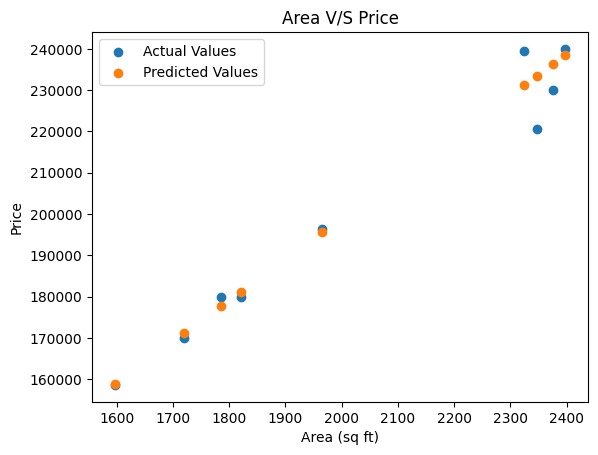

In [77]:
fig, ax = plt.subplots()
ax.scatter(x_test[:,1], y_test, label="Actual Values" )
ax.scatter(x_test[:,1], y_predictions, label="Predicted Values")
ax.set_xlabel("Area (sq ft)")
ax.set_ylabel("Price")
ax.set_title("Area V/S Price")
plt.legend()
plt.show()

##### Plotting Regression Line

In [78]:
x_range = np.arange(data["Area"].min(),data["Area"].max())
x_values = np.vstack((np.ones(x_range.shape[0]),x_range.T)).T
y_range = np.dot(x_values,weights)

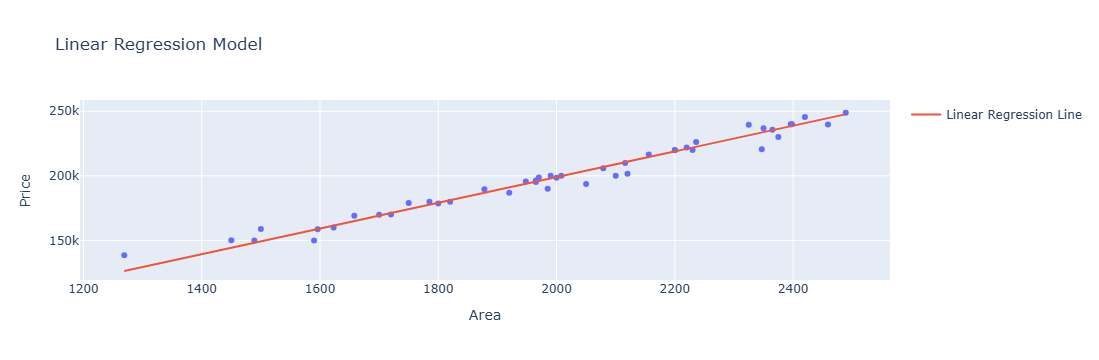

In [79]:
fig = px.scatter(data, x="Area", y="Price", title="Linear Regression Model")
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name="Linear Regression Line"))
fig.show()

##### Result DataFrame

In [80]:
results = pd.DataFrame({
    "Actual Values": y_test,
    "Predicted Values": y_predictions,
    "Difference": y_test - y_predictions
})

In [81]:
results

,Actual Values,Predicted Values,Difference
39,240000,238627.604281,1372.395719
25,179850,177627.321491,2222.678509
26,196280,195539.313175,740.686825
43,220590,233552.539971,-12962.539971
35,239580,231363.296543,8216.703457
41,230000,236338.849788,-6338.849788
4,180000,181110.208763,-1110.208763
12,170000,171159.102272,-1159.102272
8,158620,158819.730223,-199.730223
